In [1]:
import pandas as pd 
import numpy as np

#데이터 불러오기

df16 = pd.read_sas('dataset/hn16_all.sas7bdat')
df17 = pd.read_sas('dataset/hn17_all.sas7bdat')
df18 = pd.read_sas('dataset/hn18_all.sas7bdat')

In [2]:
df_all = pd.concat([df16,df17,df18])
df_att = df_all[["sex","age","D_1_1","Total_slp_wd","BP1","BO1","BE5_1","BE8_1","BE8_2","BP5","HE_ht","HE_wt"]]

## 히스토그램 추출

In [3]:
df_att.columns

Index(['sex', 'age', 'D_1_1', 'Total_slp_wd', 'BP1', 'BO1', 'BE5_1', 'BE8_1',
       'BE8_2', 'BP5', 'HE_ht', 'HE_wt'],
      dtype='object')

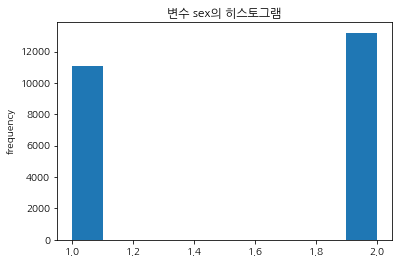

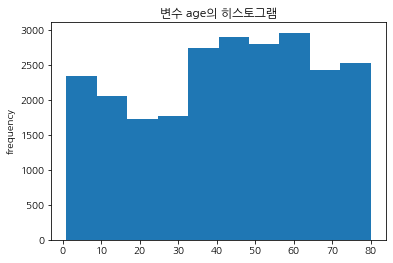

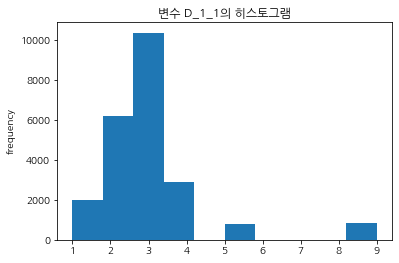

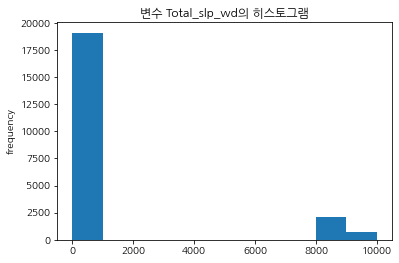

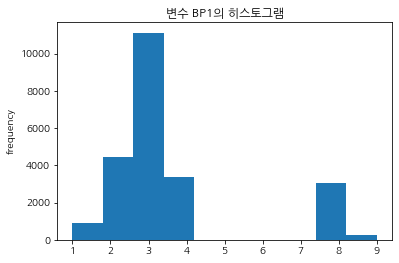

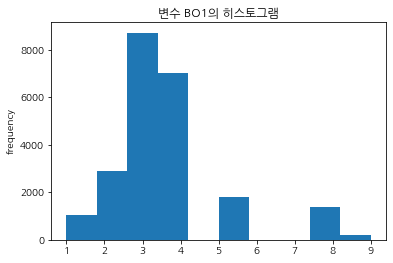

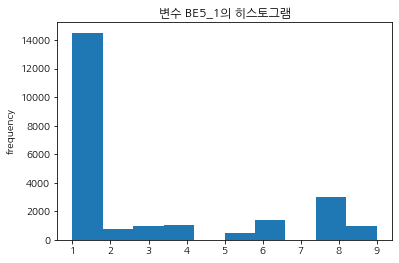

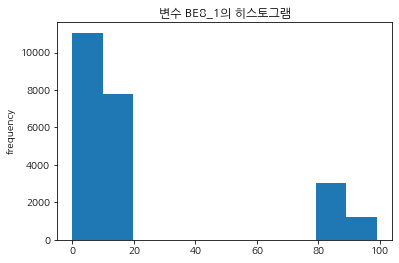

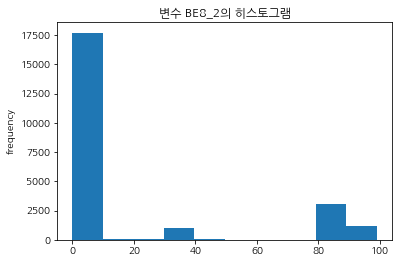

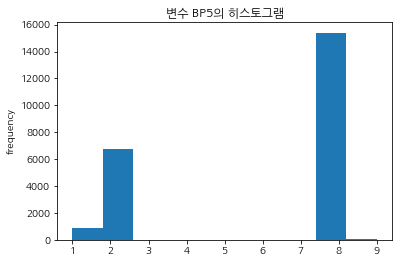

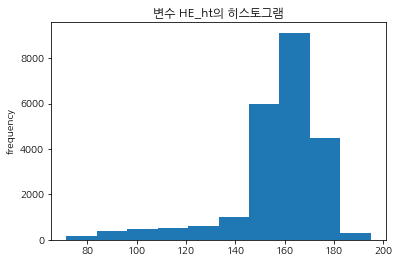

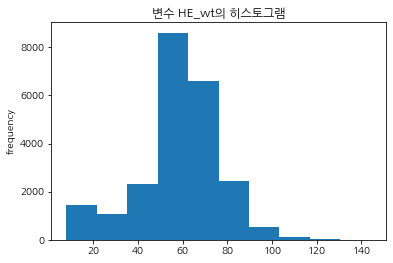

In [7]:
#히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for df in df_att.columns:
    plt.hist(df_att[df])
    plt.ylabel('frequency')
    plt.rc('font', family='NanumGothic')  
    plt.title('변수 {}의 히스토그램'.format(df))
    plt.show()
    


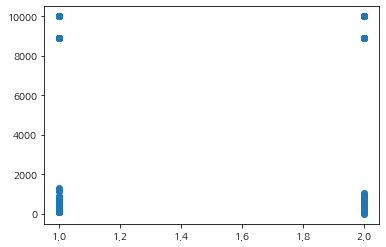

In [12]:
plt.scatter(x= df_att['sex'], y = df_att['Total_slp_wd'])

# Boxplot - 연속형 변수

### 이상치 제거 후, boxplot 확인

In [145]:
df_att = df_att.dropna()

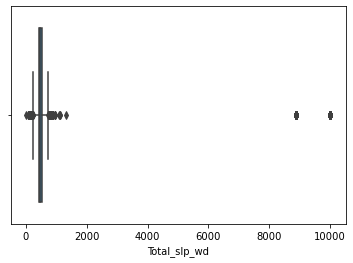

In [5]:
sns.boxplot(df_att.Total_slp_wd)

In [6]:
def remove_outlier(d_cp, column):
    
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data, 25)
    quan_75 = np.percentile(fraud_column_data, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data<lowest) | (fraud_column_data > highest)].index
    d_cp.drop(outlier_index, axis=0, inplace=True)
    
    return d_cp

In [7]:
df_remove = remove_outlier(df_att, "Total_slp_wd")
df_remove

C:\Users\rlagy\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sex,age,D_1_1,Total_slp_wd,BP1,BO1,BE5_1,BE8_1,BE8_2,BP5,HE_ht,HE_wt
0,1.0,61.0,3.0,480.0,4.0,4.0,2.0,6.0,0.0,8.0,167.2,68.7
1,2.0,57.0,3.0,540.0,3.0,3.0,1.0,14.0,0.0,8.0,156.6,52.0
2,2.0,41.0,3.0,420.0,3.0,4.0,1.0,11.0,0.0,8.0,157.8,58.8
3,1.0,39.0,4.0,420.0,2.0,5.0,1.0,4.0,0.0,8.0,176.7,93.4
4,2.0,38.0,3.0,390.0,2.0,3.0,1.0,13.0,0.0,8.0,159.5,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2.0,73.0,3.0,660.0,3.0,3.0,1.0,5.0,0.0,8.0,145.2,51.8
7988,1.0,43.0,3.0,540.0,2.0,5.0,1.0,10.0,0.0,8.0,176.8,84.1
7989,2.0,39.0,9.0,NaN,3.0,3.0,9.0,99.0,99.0,8.0,163.1,59.5
7990,1.0,10.0,3.0,NaN,8.0,3.0,8.0,88.0,88.0,8.0,141.4,35.3


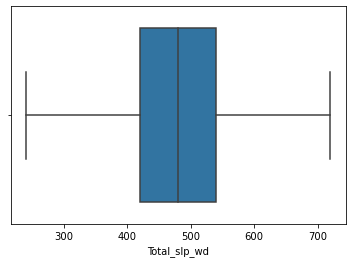

In [149]:
sns.boxplot(df_remove.Total_slp_wd)